In [329]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [330]:
_x = np.linspace(-5,5, 100)
_y = x**2

Creating training set

In [331]:
W_true = [3,2]
m = 30
X_train = np.linspace(-5, 4, m)  + np.random.randn(m) + 2
Y_train = (W_true[0]*X_train**2) + (W_true[1]*X_train) + (np.random.randn(m) * 4)

Lets plot results

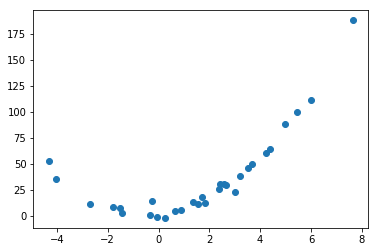

In [332]:
fig, ax = plt.subplots()
# parabola = ax.plot(x,y, 'r')
scatter = ax.scatter(X_train,Y_train)

In [333]:
X = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='X')
Y = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='Y')
W = tf.Variable(np.random.rand(3,1), name='weights', dtype=tf.float32)
out = (W[0] * X**2) + (W[1] * X) + W[2]

In [334]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

/Users/user/Library/Python/3.6/lib/python/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [335]:
cost = tf.losses.mean_squared_error(labels=Y, predictions=out)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.001).minimize(cost)
W.eval()

array([[0.53621626],
       [0.15343618],
       [0.82703453]], dtype=float32)

In [336]:
ret = sess.run([optimizer, cost], feed_dict={Y: Y_train.reshape(m, 1), X: X_train.reshape(m,1)})
print(ret, W.eval())

[None, 1991.1594] [[1.999755  ]
 [0.38010377]
 [0.88546664]]


In [339]:
for i in range(10000):
    r = sess.run([cost, optimizer], feed_dict={Y: Y_train.reshape(m, 1), X: X_train.reshape(m,1)})

In [340]:
W.eval()

array([[2.8601093],
       [2.1681542],
       [2.2385578]], dtype=float32)

plot with W